In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
#checking the survival rate based on gender because the sample gender_submission csv hypothesizes that all women survive and all men die
women_survive = train.loc[train.Sex=='female']["Survived"]
percent_women_survived = sum(women_survive)/len(women_survive)
percent_women_survived


0.7420382165605095

In [6]:
male_survive = train.loc[train.Sex =='male']['Survived']
percent_male_survived = sum(male_survive)/len(male_survive)
percent_male_survived


0.18890814558058924

In [7]:
#We can see that almost 75% of the women on board survived whereas only about 19% of men survived. Gender is a big factor foir survival. 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [10]:
# check numerical and categorical data 
df_numerical = train[['Age', 'SibSp', 'Parch', 'Fare']]
df_categorical = train[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]\



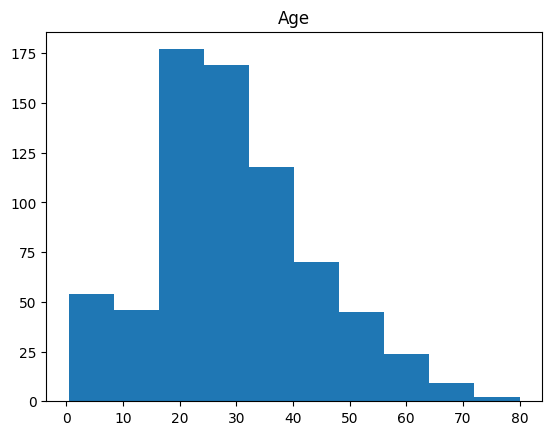

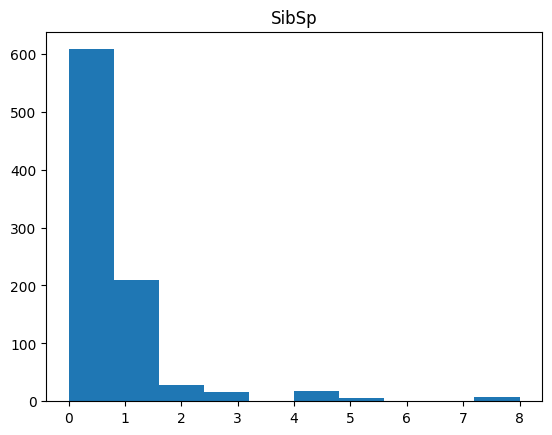

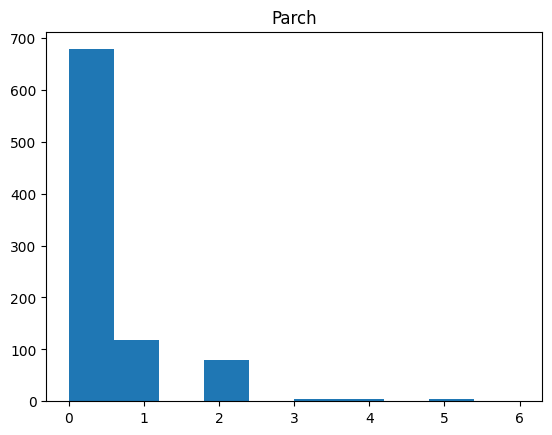

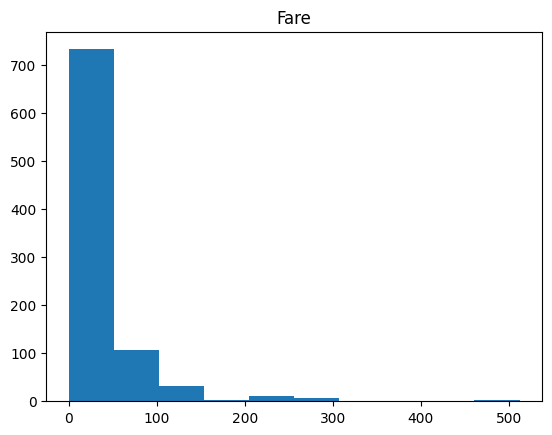

In [11]:
from matplotlib import pyplot as plt

for i in df_numerical.columns:
    plt.hist(df_numerical[i])
    plt.title(i)
    plt.show()

In [12]:
#Age follows a normal distribution whereas others don't 

In [13]:
df_numerical.corr()

,Age,SibSp,Parch,Fare
Age,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.308247,1.000000,0.414838,0.159651
Parch,-0.189119,0.414838,1.000000,0.216225
Fare,0.096067,0.159651,0.216225,1.000000


<Axes: >

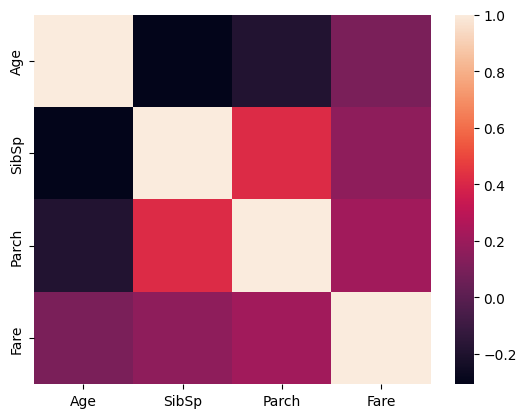

In [14]:
import seaborn as sns
sns.heatmap(df_numerical.corr())

In [15]:
# survi8val raters across Age, SiSp, Parch and Fare
pd.pivot_table(train, index = "Survived", values = ['Age', 'SibSp', 'Parch', 'Fare'])

#shows thast young and proabably rich people who paid more survived if you have parents, they might have put you first so more chance of survical.
#If you have siblings or children less chance of survival

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


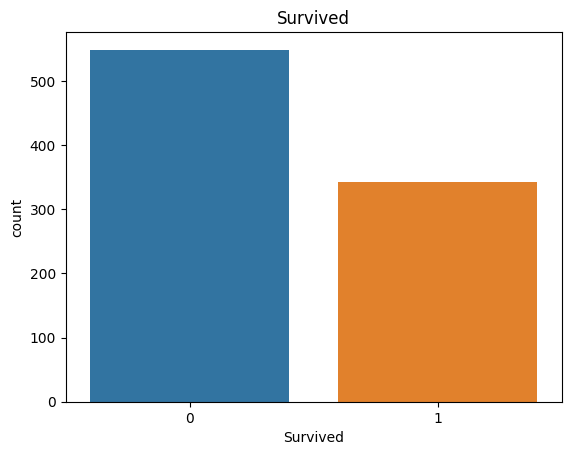

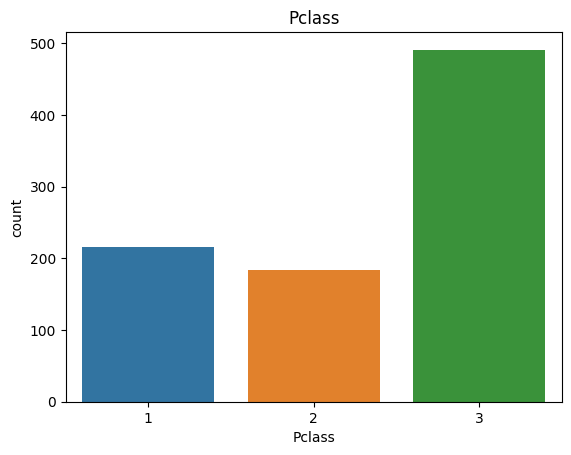

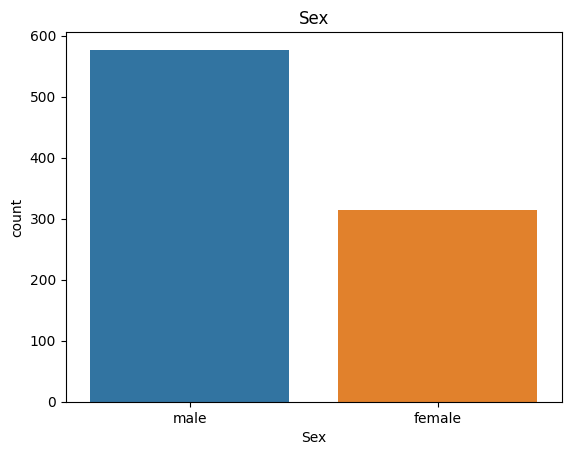

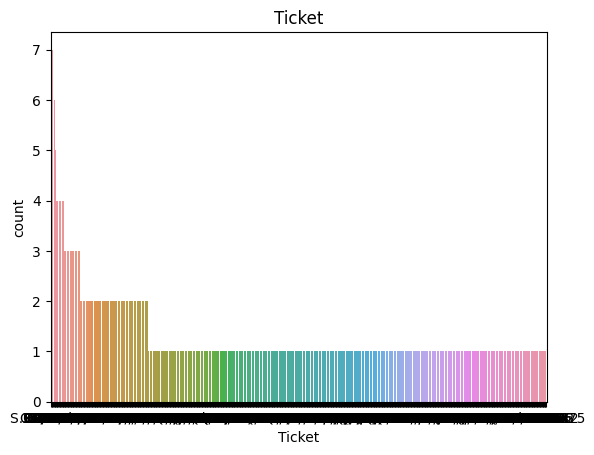

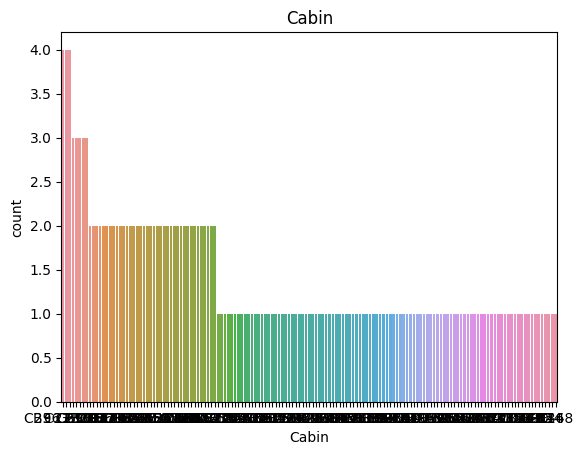

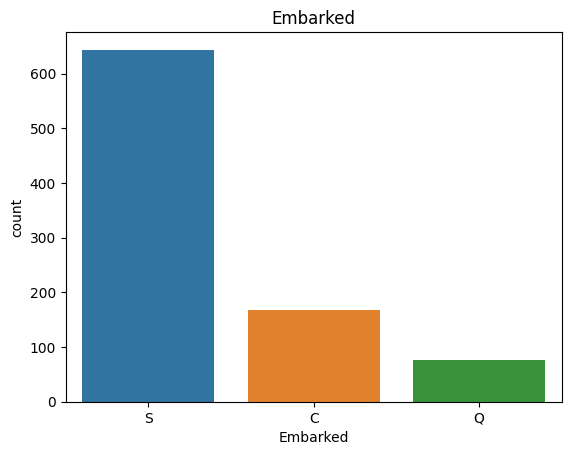

In [16]:
for i in df_categorical.columns:
    sns.barplot(x= df_categorical[i].value_counts().index, y=df_categorical[i].value_counts()).set_title(i)
    plt.show()

In [17]:
pd.pivot_table(train, index = "Survived", columns = "Pclass", values = "Ticket", aggfunc=  'count')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [18]:
pd.pivot_table(train, index = "Survived", columns = "Sex", values = "Ticket", aggfunc=  'count')


Sex,female,male
Survived,,
0,81,468
1,233,109


In [19]:

pd.pivot_table(train, index = "Survived", columns = "Embarked", values = "Ticket", aggfunc=  'count')

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [20]:
#Feature Engineering 
# 1) Simplify Cabins - if Cabin or purchase of tickets across multiple cabins imapct survival?
# 2) Tickets- relationship between types of tickets and survival 
# 3) person's title related to survival?

df_categorical.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [21]:
train['cabin_multiple']= train.Cabin.apply(lambda x:0 if pd.isna(x) else len(x.split(' ')))
train['cabin_multiple'].value_counts()

cabin_multiple
0    687
1    180
2     16
3      6
4      2
Name: count, dtype: int64

In [22]:
pd.pivot_table(train,index = "Survived", columns = "cabin_multiple", values = "Ticket", aggfunc = "count")

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [23]:
#creating categories based on the cabin letter 
train['cabin_adv'] = train.Cabin.apply(lambda x : str(x)[0])


In [24]:
train['cabin_adv'].value_counts()

cabin_adv
n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

In [25]:
pd.pivot_table(train, index = 'Survived', columns = 'cabin_adv', values = 'Name', aggfunc= 'count')

cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [26]:
#Feature Engineering 
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [27]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

train['IsAlone'] = (train['FamilySize'] == 1).astype(int)
test['IsAlone'] = (test['FamilySize'] == 1).astype(int)


In [28]:
train['FarePerPerson'] = train['Fare'] / train['FamilySize']
test['FarePerPerson'] = test['Fare'] / test['FamilySize']


In [29]:
# Age Bins
train['AgeBin'] = pd.cut(train['Age'], bins=[0, 12, 20, 40, 60, 80], labels=[1, 2, 3, 4, 5])
test['AgeBin'] = pd.cut(test['Age'], bins=[0, 12, 20, 40, 60, 80], labels=[1, 2, 3, 4, 5])

# Fare Bins
train['FareBin'] = pd.qcut(train['Fare'], 4, labels=[1, 2, 3, 4])
test['FareBin'] = pd.qcut(test['Fare'], 4, labels=[1, 2, 3, 4])


In [30]:
# One-hot encode Embarked and Title
train = pd.get_dummies(train, columns=['Embarked', 'Title'], drop_first=True)
test = pd.get_dummies(test, columns=['Embarked', 'Title'], drop_first=True)

# Align columns between train and test
test = test.reindex(columns=train.columns, fill_value=0)


In [31]:
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
train = train.drop(columns=columns_to_drop, axis=1)
test = test.drop(columns=columns_to_drop, axis=1)

In [32]:
print(train.dtypes)


Survived             int64
Pclass               int64
Sex                 object
Age                float64
SibSp                int64
Parch                int64
Fare               float64
cabin_multiple       int64
cabin_adv           object
FamilySize           int64
IsAlone              int64
FarePerPerson      float64
AgeBin            category
FareBin           category
Embarked_Q            bool
Embarked_S            bool
Title_Col             bool
Title_Countess        bool
Title_Don             bool
Title_Dr              bool
Title_Jonkheer        bool
Title_Lady            bool
Title_Major           bool
Title_Master          bool
Title_Miss            bool
Title_Mlle            bool
Title_Mme             bool
Title_Mr              bool
Title_Mrs             bool
Title_Ms              bool
Title_Rev             bool
Title_Sir             bool
dtype: object


In [33]:
# Fill missing numeric columns with 0
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns
train[numeric_cols] = train[numeric_cols].fillna(0)
test[numeric_cols] = test[numeric_cols].fillna(0)

# Fill missing categorical columns with the mode
categorical_cols = train.select_dtypes(include=['category', 'object']).columns
for col in categorical_cols:
    train[col] = train[col].fillna(train[col].mode()[0])
    test[col] = test[col].fillna(test[col].mode()[0])

# Fill missing boolean columns with False
bool_cols = train.select_dtypes(include=['bool']).columns
train[bool_cols] = train[bool_cols].fillna(False)
test[bool_cols] = test[bool_cols].fillna(False)

# Verify no missing values remain
print(train.isnull().sum())
print(test.isnull().sum())


Survived          0
Pclass            0
Sex               0
Age               0
SibSp             0
Parch             0
Fare              0
cabin_multiple    0
cabin_adv         0
FamilySize        0
IsAlone           0
FarePerPerson     0
AgeBin            0
FareBin           0
Embarked_Q        0
Embarked_S        0
Title_Col         0
Title_Countess    0
Title_Don         0
Title_Dr          0
Title_Jonkheer    0
Title_Lady        0
Title_Major       0
Title_Master      0
Title_Miss        0
Title_Mlle        0
Title_Mme         0
Title_Mr          0
Title_Mrs         0
Title_Ms          0
Title_Rev         0
Title_Sir         0
dtype: int64
Survived          0
Pclass            0
Sex               0
Age               0
SibSp             0
Parch             0
Fare              0
cabin_multiple    0
cabin_adv         0
FamilySize        0
IsAlone           0
FarePerPerson     0
AgeBin            0
FareBin           0
Embarked_Q        0
Embarked_S        0
Title_Col         0
Title_C

In [34]:
# Combine train and test to ensure consistent encoding
combined = pd.concat([train, test], axis=0, ignore_index=True)

# One-hot encode categorical columns
combined = pd.get_dummies(combined, columns=['Sex', 'cabin_adv'], drop_first=True)

# Split back into train and test
train = combined.loc[:len(train) - 1, :]
test = combined.loc[len(train):, :]

# Verify columns
print("Train columns:", train.columns)
print("Test columns:", test.columns)



Train columns: Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'cabin_multiple',
       'FamilySize', 'IsAlone', 'FarePerPerson', 'AgeBin', 'FareBin',
       'Embarked_Q', 'Embarked_S', 'Title_Col', 'Title_Countess', 'Title_Don',
       'Title_Dr', 'Title_Jonkheer', 'Title_Lady', 'Title_Major',
       'Title_Master', 'Title_Miss', 'Title_Mlle', 'Title_Mme', 'Title_Mr',
       'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_Sir', 'Sex_male',
       'cabin_adv_A', 'cabin_adv_B', 'cabin_adv_C', 'cabin_adv_D',
       'cabin_adv_E', 'cabin_adv_F', 'cabin_adv_G', 'cabin_adv_T',
       'cabin_adv_n'],
      dtype='object')
Test columns: Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'cabin_multiple',
       'FamilySize', 'IsAlone', 'FarePerPerson', 'AgeBin', 'FareBin',
       'Embarked_Q', 'Embarked_S', 'Title_Col', 'Title_Countess', 'Title_Don',
       'Title_Dr', 'Title_Jonkheer', 'Title_Lady', 'Title_Major',
       'Title_Master', 'Title_Miss', 'Title_Mlle', 'Titl

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# cross-validation
cv_scores = cross_val_score(rf_model, train.drop(['Survived'], axis=1), train['Survived'], cv=5, scoring='accuracy')

print(f"Cross-validation accuracy: {cv_scores.mean():.4f}")


Cross-validation accuracy: 0.8058


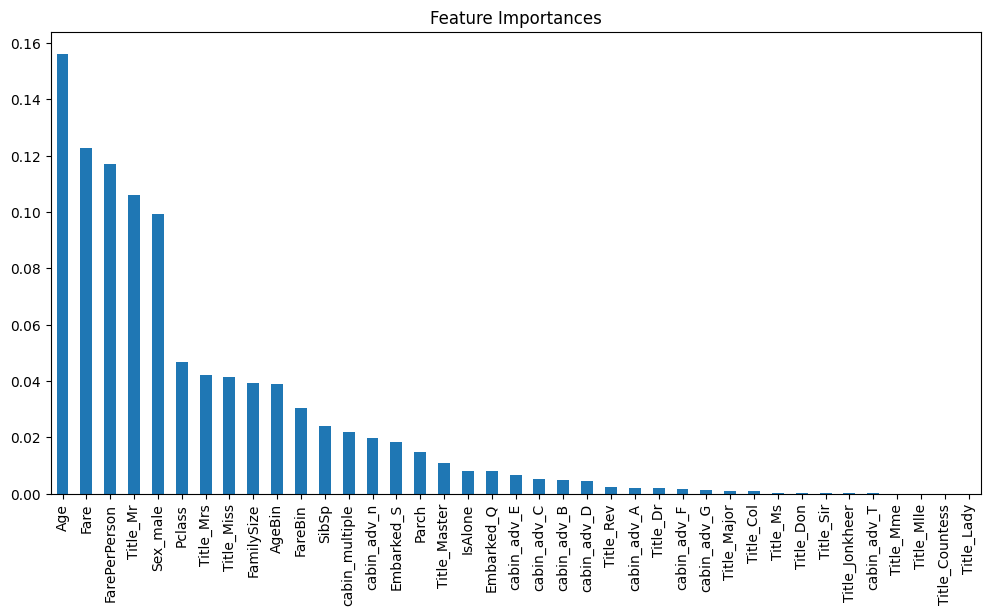

In [36]:
#  Random Forest model to get feature importances
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(train.drop(['Survived'], axis=1), train['Survived'])

importances = pd.Series(rf_model.feature_importances_, index=train.drop(['Survived'], axis=1).columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), title="Feature Importances");


In [37]:
# features with importance > 0.01
important_features = importances[importances > 0.01].index
train_reduced = train[important_features.tolist() + ['Survived']]
test_reduced = test[important_features.tolist()]


In [38]:
#Hyper parameter tuning 
from sklearn.model_selection import GridSearchCV

# parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(train_reduced.drop(['Survived'], axis=1), train_reduced['Survived'])

# Best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV Accuracy: {grid_search.best_score_:.4f}")


Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best CV Accuracy: 0.8429


In [39]:
# final model with best parameters
best_params = grid_search.best_params_
final_model = RandomForestClassifier(
    random_state=42,
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf']
)

final_model.fit(train_reduced.drop(['Survived'], axis=1), train_reduced['Survived'])


RandomForestClassifier(min_samples_leaf=2, min_samples_split=10,
                       random_state=42)

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

train_predictions = final_model.predict(train_reduced.drop(['Survived'], axis=1))

# Evaluate performance on training set
train_accuracy = accuracy_score(train_reduced['Survived'], train_predictions)
print(f"Training Accuracy: {train_accuracy:.4f}")

print("Confusion Matrix:\n", confusion_matrix(train_reduced['Survived'], train_predictions))
print("\nClassification Report:\n", classification_report(train_reduced['Survived'], train_predictions))


Training Accuracy: 0.8945
Confusion Matrix:
 [[519  30]
 [ 64 278]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       549
           1       0.90      0.81      0.86       342

    accuracy                           0.89       891
   macro avg       0.90      0.88      0.89       891
weighted avg       0.89      0.89      0.89       891



In [41]:

test_predictions = final_model.predict(test_reduced)


In [42]:
test_original = pd.read_csv('/kaggle/input/titanic/test.csv')
test_reduced['PassengerId'] = test_original['PassengerId']


/tmp/ipykernel_17/708985940.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_reduced['PassengerId'] = test_original['PassengerId']


In [43]:
submission = pd.DataFrame({'PassengerId': test_reduced['PassengerId'], 'Survived': test_predictions})
submission.to_csv('submission.csv', index=False)
